<a href="https://colab.research.google.com/github/SulemanShahani/Product-Recommendations-through-Market-Basket-Analysis-of-Retail-Data/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing market basket analysis

In [6]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#Reading Data From Web
myretaildata = pd.read_excel('/content/Online Retail.xlsx', engine='openpyxl')
myretaildata.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preparation

In [13]:
#Data Cleaning
myretaildata['Description'] = myretaildata['Description'].str.strip() #removes spaces from beginning and end
myretaildata.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #removes duplicate invoice
myretaildata['InvoiceNo'] = myretaildata['InvoiceNo'].astype('str') #converting invoice number to be string
myretaildata = myretaildata[~myretaildata['InvoiceNo'].str.contains('C')] #remove the credit transactions
myretaildata.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
myretaildata['Country'].value_counts()
#myretaildata.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country
United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [15]:
#Separating transactions for Germany
mybasket = (myretaildata[myretaildata['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#viewing transaction basket
mybasket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Training Model

In [19]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [20]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#viewing top 100 rules
my_rules.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951,0.723103
1,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006,0.633174
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018,0.847826
5,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427,0.713415


# Making reecommendations

In [22]:
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


112

In [23]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


47

In [24]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.3) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Viewing the top 20 rules
top_rules = my_rules.sort_values(by='lift', ascending=False).head(20)
print(top_rules)


                            antecedents                           consequents  \
2   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
3  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)   
5                  (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
4  (ROUND SNACK BOXES SET OF4 WOODLAND)                  (SPACEBOY LUNCH BOX)   
0  (ROUND SNACK BOXES SET OF4 WOODLAND)    (PLASTERS IN TIN WOODLAND ANIMALS)   
1    (PLASTERS IN TIN WOODLAND ANIMALS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.157549            0.245077  0.131291    0.833333  3.400298   
3            0.245077            0.157549  0.131291    0.535714  3.400298   
5            0.102845            0.245077  0.070022    0.680851  2.778116   
4            0.245077            0.102845  0.070022    0.285714  2.778116   
0            0.245077            0.137856  0.07

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


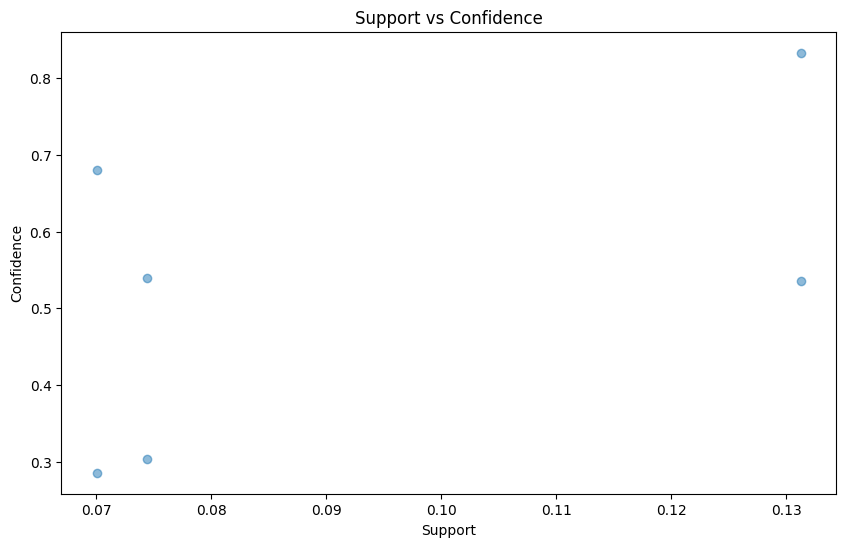

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(my_rules['support'], my_rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


In [27]:
# Filtering rules based on lift and confidence
filtered_rules = my_rules[(my_rules['lift'] >= 3) &
                          (my_rules['confidence'] >= 0.3)]
print(filtered_rules)


                            antecedents                           consequents  \
2   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
3  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.157549            0.245077  0.131291    0.833333  3.400298   
3            0.245077            0.157549  0.131291    0.535714  3.400298   

   leverage  conviction  zhangs_metric  
2  0.092679    4.529540       0.837922  
3  0.092679    1.814509       0.935072  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(myretaildata, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

train_basket_sets = train_basket.applymap(encode_units)
train_basket_sets.drop('POSTAGE', inplace=True, axis=1)

test_basket_sets = test_basket.applymap(encode_units)
test_basket_sets.drop('POSTAGE', inplace=True, axis=1)


# Prepare the training data
train_basket = (train_data[train_data['Country'] == "Germany"]
                .groupby(['InvoiceNo', 'Description'])['Quantity']
                .sum().unstack().reset_index().fillna(0)
                .set_index('InvoiceNo'))

train_basket_sets = train_basket.applymap(encode_units)
train_basket_sets.drop('POSTAGE', inplace=True, axis=1)

# Generate frequent itemsets and rules on the training data
train_frequent_itemsets = apriori(train_basket_sets, min_support=0.07, use_colnames=True)
train_rules = association_rules(train_frequent_itemsets, metric="lift", min_threshold=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [37]:
test_basket = (test_data[test_data['Country'] == "Germany"]
               .groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0)
               .set_index('InvoiceNo'))

test_basket_sets = test_basket.applymap(encode_units)
test_basket_sets.drop('POSTAGE', inplace=True, axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
def validate_rule(rule, test_data):
    antecedent = list(rule['antecedents'])[0]
    consequent = list(rule['consequents'])[0]

    # Count the number of transactions containing the antecedent
    antecedent_count = test_data[test_data[antecedent] == 1].shape[0]

    # Count the number of transactions containing both the antecedent and consequent
    both_count = test_data[(test_data[antecedent] == 1) & (test_data[consequent] == 1)].shape[0]

    return antecedent_count, both_count

# Validate each rule
validation_results = []
for _, rule in train_rules.iterrows():
    antecedent_count, both_count = validate_rule(rule, test_basket_sets)
    validation_results.append({
        'antecedent': list(rule['antecedents'])[0],
        'consequent': list(rule['consequents'])[0],
        'antecedent_count': antecedent_count,
        'both_count': both_count,
        'confidence': both_count / antecedent_count if antecedent_count > 0 else 0
    })

validation_df = pd.DataFrame(validation_results)
print(validation_df)


                           antecedent                          consequent  \
0   ROUND SNACK BOXES SET OF 4 FRUITS  ROUND SNACK BOXES SET OF4 WOODLAND   
1  ROUND SNACK BOXES SET OF4 WOODLAND   ROUND SNACK BOXES SET OF 4 FRUITS   

   antecedent_count  both_count  confidence  
0                15           4    0.266667  
1                27           4    0.148148  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
train_frequent_itemsets = apriori(train_basket_sets, min_support=0.07, use_colnames=True)
train_rules = association_rules(train_frequent_itemsets, metric="lift", min_threshold=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [42]:
def validate_rule(rule, test_data):
    antecedent = list(rule['antecedents'])[0]
    consequent = list(rule['consequents'])[0]

    # Count the number of transactions containing the antecedent
    antecedent_count = test_data[test_data[antecedent] == 1].shape[0]

    # Count the number of transactions containing both the antecedent and consequent
    both_count = test_data[(test_data[antecedent] == 1) & (test_data[consequent] == 1)].shape[0]

    return antecedent_count, both_count

# Validate each rule
validation_results = []
for _, rule in train_rules.iterrows():
    antecedent_count, both_count = validate_rule(rule, test_basket_sets)
    if antecedent_count > 0:
        validation_results.append({
            'antecedent': list(rule['antecedents'])[0],
            'consequent': list(rule['consequents'])[0],
            'antecedent_count': antecedent_count,
            'both_count': both_count,
            'test_confidence': both_count / antecedent_count if antecedent_count > 0 else 0,
            'train_confidence': rule['confidence']
        })

validation_df = pd.DataFrame(validation_results)
print(validation_df)


                           antecedent                          consequent  \
0   ROUND SNACK BOXES SET OF 4 FRUITS  ROUND SNACK BOXES SET OF4 WOODLAND   
1  ROUND SNACK BOXES SET OF4 WOODLAND   ROUND SNACK BOXES SET OF 4 FRUITS   

   antecedent_count  both_count  test_confidence  train_confidence  
0                15           4         0.266667          0.578947  
1                27           4         0.148148          0.383721  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Understanding the Results
antecedent_count: The number of transactions in the test dataset that contain the antecedent item.
both_count: The number of transactions in the test dataset that contain both the antecedent and consequent items.
test_confidence: The confidence of the rule in the test dataset, calculated as both_count / antecedent_count.
train_confidence: The confidence of the rule in the training dataset.


ROUND SNACK BOXES SET OF 4 FRUITS -> ROUND SNACK BOXES SET OF4 WOODLAND:

Training confidence: 0.578947
Test confidence: 0.266667
This rule's confidence dropped in the test data, indicating it may not generalize well.
ROUND SNACK BOXES SET OF4 WOODLAND -> ROUND SNACK BOXES SET OF 4 FRUITS:

Training confidence: 0.383721
Test confidence: 0.148148
Similarly, this rule also shows a drop in confidence.

In [43]:
validation_df['confidence_drop'] = validation_df['train_confidence'] - validation_df['test_confidence']
significant_drop = validation_df[validation_df['confidence_drop'] > 0.1]  # Threshold for significant drop

print(significant_drop)


                           antecedent                          consequent  \
0   ROUND SNACK BOXES SET OF 4 FRUITS  ROUND SNACK BOXES SET OF4 WOODLAND   
1  ROUND SNACK BOXES SET OF4 WOODLAND   ROUND SNACK BOXES SET OF 4 FRUITS   

   antecedent_count  both_count  test_confidence  train_confidence  \
0                15           4         0.266667          0.578947   
1                27           4         0.148148          0.383721   

   confidence_drop  
0         0.312281  
1         0.235573  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


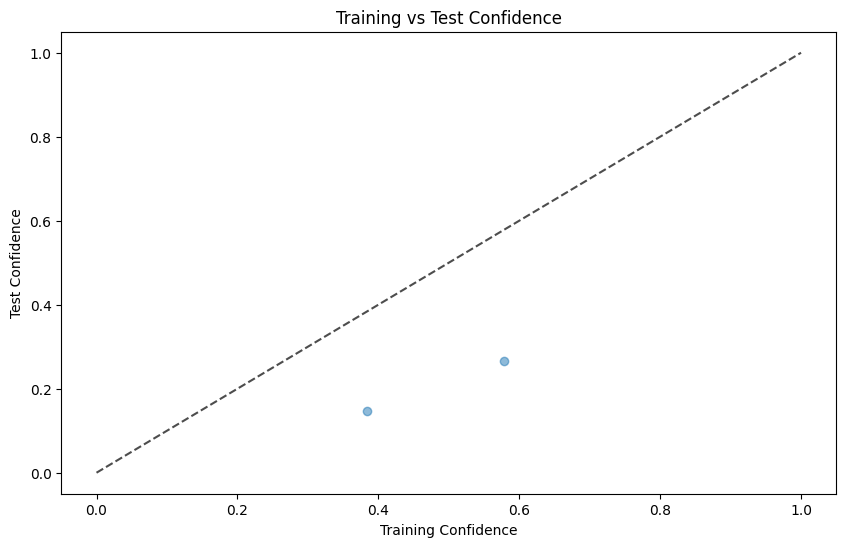

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(validation_df['train_confidence'], validation_df['test_confidence'], alpha=0.5)
plt.plot([0, 1], [0, 1], ls="--", c=".3")  # Reference line for equal confidence
plt.xlabel('Training Confidence')
plt.ylabel('Test Confidence')
plt.title('Training vs Test Confidence')
plt.show()
